In [254]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import StrMethodFormatter


In [221]:
conn = psycopg2.connect(dbname = 'postgres',
                        user = 'postgres',
                        password = 'password',
                        host = 'localhost',
                        port = '5432')

In [222]:
cursor = conn.cursor()

# SQL
### Display the first and last name of each actor in a single column in upper case letters.  Name that column "Actor Name"


In [223]:
query1 = """
SELECT UPPER(CONCAT(first_name, ' ', last_name)) AS "Actor Name"
FROM actor
ORDER BY last_name
"""
cursor.execute(query1)
result1 = cursor.fetchall()
result1

[('DEBBIE AKROYD',),
 ('KIRSTEN AKROYD',),
 ('CHRISTIAN AKROYD',),
 ('MERYL ALLEN',),
 ('KIM ALLEN',),
 ('CUBA ALLEN',),
 ('ANGELINA ASTAIRE',),
 ('RUSSELL BACALL',),
 ('AUDREY BAILEY',),
 ('JESSICA BAILEY',),
 ('HARRISON BALE',),
 ('RENEE BALL',),
 ('JULIA BARRYMORE',),
 ('VIVIEN BASINGER',),
 ('MICHAEL BENING',),
 ('SCARLETT BENING',),
 ('VIVIEN BERGEN',),
 ('LIZA BERGMAN',),
 ('KARL BERRY',),
 ('CHRISTOPHER BERRY',),
 ('HENRY BERRY',),
 ('CUBA BIRCH',),
 ('KEVIN BLOOM',),
 ('VAL BOLGER',),
 ('MICHAEL BOLGER',),
 ('CHRIS BRIDGES',),
 ('LAURA BRODY',),
 ('GOLDIE BRODY',),
 ('LAURENCE BULLOCK',),
 ('ZERO CAGE',),
 ('JOHNNY CAGE',),
 ('MATTHEW CARREY',),
 ('GREG CHAPLIN',),
 ('JON CHASE',),
 ('ED CHASE',),
 ('RUSSELL CLOSE',),
 ('FRED COSTNER',),
 ('RIP CRAWFORD',),
 ('DARYL CRAWFORD',),
 ('ANNE CRONYN',),
 ('PENELOPE CRONYN',),
 ('SIDNEY CROWE',),
 ('JUDE CRUISE',),
 ('RALPH CRUZ',),
 ('SCARLETT DAMON',),
 ('JENNIFER DAVIS',),
 ('SUSAN DAVIS',),
 ('SUSAN DAVIS',),
 ('FRANCES DAY-LEWIS'

### Find all actors whose last name contains the letters "LI"


In [224]:
query2 = """
SELECT first_name, last_name
FROM actor
WHERE last_name LIKE '%LI%'
"""

cursor.execute(query2)
result2 = cursor.fetchall()
result2

[('CUBA', 'OLIVIER'),
 ('AUDREY', 'OLIVIER'),
 ('SEAN', 'WILLIAMS'),
 ('WOODY', 'JOLIE'),
 ('BEN', 'WILLIS'),
 ('GREG', 'CHAPLIN'),
 ('GENE', 'WILLIS'),
 ('MORGAN', 'WILLIAMS'),
 ('HUMPHREY', 'WILLIS'),
 ('GROUCHO', 'WILLIAMS')]

### List the last names of actors, as well as the amount of actors who have that last name


In [225]:
query3 = """ 
SELECT last_name, COUNT(last_name)
FROM actor
GROUP BY last_name
ORDER BY COUNT(last_name) DESC
"""

cursor.execute(query3)
result3 = cursor.fetchall()
result3

[('KILMER', 5),
 ('TEMPLE', 4),
 ('NOLTE', 4),
 ('WILLIAMS', 3),
 ('PECK', 3),
 ('HOPKINS', 3),
 ('DAVIS', 3),
 ('HARRIS', 3),
 ('DEGENERES', 3),
 ('HOFFMAN', 3),
 ('GARLAND', 3),
 ('BERRY', 3),
 ('KEITEL', 3),
 ('TORN', 3),
 ('GUINESS', 3),
 ('JOHANSSON', 3),
 ('ZELLWEGER', 3),
 ('AKROYD', 3),
 ('WILLIS', 3),
 ('ALLEN', 3),
 ('CRONYN', 2),
 ('DEPP', 2),
 ('JACKMAN', 2),
 ('HOPPER', 2),
 ('DUKAKIS', 2),
 ('TRACY', 2),
 ('MONROE', 2),
 ('MOSTEL', 2),
 ('MCKELLEN', 2),
 ('WAHLBERG', 2),
 ('DEAN', 2),
 ('BENING', 2),
 ('SILVERSTONE', 2),
 ('WEST', 2),
 ('HACKMAN', 2),
 ('BOLGER', 2),
 ('DEE', 2),
 ('MCQUEEN', 2),
 ('DENCH', 2),
 ('NEESON', 2),
 ('STREEP', 2),
 ('CAGE', 2),
 ('BRODY', 2),
 ('WINSLET', 2),
 ('WOOD', 2),
 ('GOODING', 2),
 ('PENN', 2),
 ('MCCONAUGHEY', 2),
 ('CHASE', 2),
 ('BAILEY', 2),
 ('PALTROW', 2),
 ('TANDY', 2),
 ('CRAWFORD', 2),
 ('FAWCETT', 2),
 ('OLIVIER', 2),
 ('CARREY', 1),
 ('JOLIE', 1),
 ('TOMEI', 1),
 ('BACALL', 1),
 ('PESCI', 1),
 ('TAUTOU', 1),
 ('LEIGH', 1),


### Display the first name, last name, full address, and total payment amount collected in 2022 for each staff member.


In [226]:
query4 = """ 
SELECT first_name, last_name, address, address2, city, country, SUM(amount)
FROM staff
RIGHT JOIN address ON staff.address_id = address.address_id
RIGHT JOIN city ON address.city_id = city.city_id
FULL JOIN country ON city.country_id = country.country_id
RIGHT JOIN payment ON staff.staff_id = payment.staff_id
GROUP BY first_name, last_name, address, address2, city, country
"""

cursor.execute(query4)
result4 = cursor.fetchall()
result4

[('Jon',
  'Stephens',
  '1411 Lillydale Drive',
  None,
  'Woodridge',
  'Australia',
  Decimal('33927.04')),
 ('Mike',
  'Hillyer',
  '23 Workhaven Lane',
  None,
  'Lethbridge',
  'Canada',
  Decimal('33489.47'))]

### Display all actors who appear in the film Alone Trip


In [227]:
query5 = """ 
SELECT CONCAT(first_name, ' ', last_name) AS actor_name
FROM actor
INNER JOIN film_actor ON actor.actor_id = film_actor.actor_id
INNER JOIN film ON film_actor.film_id = film.film_id
WHERE film.title = 'ALONE TRIP'
"""

cursor.execute(query5)
result5 = cursor.fetchall()
result5

[('ED CHASE',),
 ('KARL BERRY',),
 ('UMA WOOD',),
 ('WOODY JOLIE',),
 ('SPENCER DEPP',),
 ('CHRIS DEPP',),
 ('LAURENCE BULLOCK',),
 ('RENEE BALL',)]

### What customer had the highest amount of rentals in 2005?


In [228]:
query6 = """ 
SELECT CONCAT(first_name, ' ', last_name) AS customer_name, COUNT(rental.customer_id)
FROM customer
LEFT JOIN rental ON customer.customer_id = rental.customer_id
GROUP BY customer_name
ORDER BY COUNT(rental.customer_id) DESC
LIMIT 1
"""

cursor.execute(query6)
result6 = cursor.fetchall()
result6

[('ELEANOR HUNT', 46)]

### What store had the highest number of rentals for family movies?


In [229]:
query7 = """ 
SELECT inventory.store_id, COUNT(inventory.store_id) AS z
FROM inventory
INNER JOIN rental ON inventory.inventory_id = rental.inventory_id
INNER JOIN film ON inventory.film_id = film.film_id
INNER JOIN film_category ON film.film_id = film_category.film_id
INNER JOIN category ON film_category.category_id = category.category_id
WHERE category.name = 'Family'
GROUP BY inventory.store_id
ORDER BY z DESC
LIMIT 1
"""

cursor.execute(query7)
result7 = cursor.fetchall()
result7

[(1, 557)]

# Python
### Create a graphic to display the top 20 rented films.  Then do the same for the bottom 20


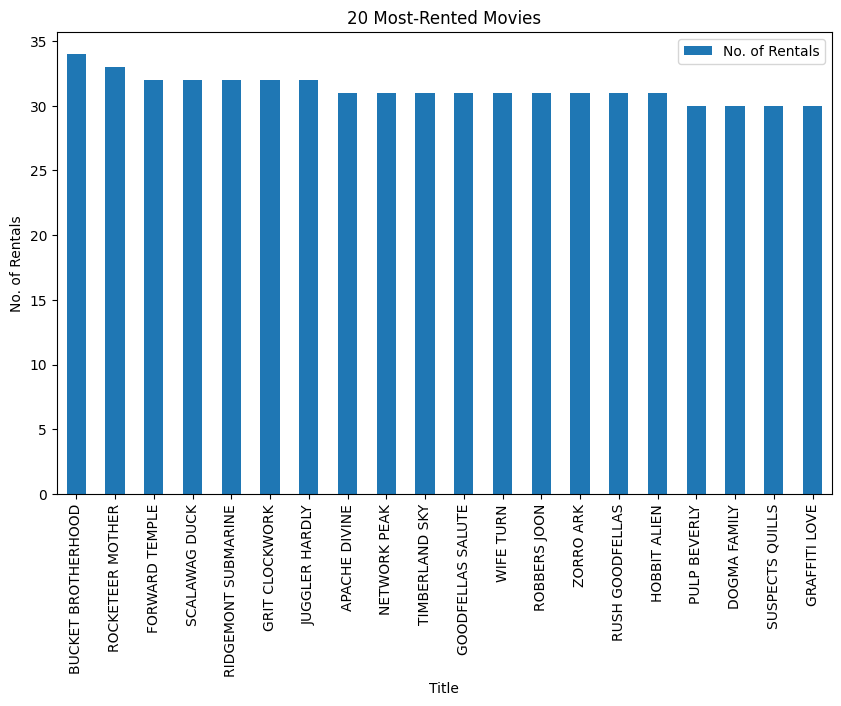

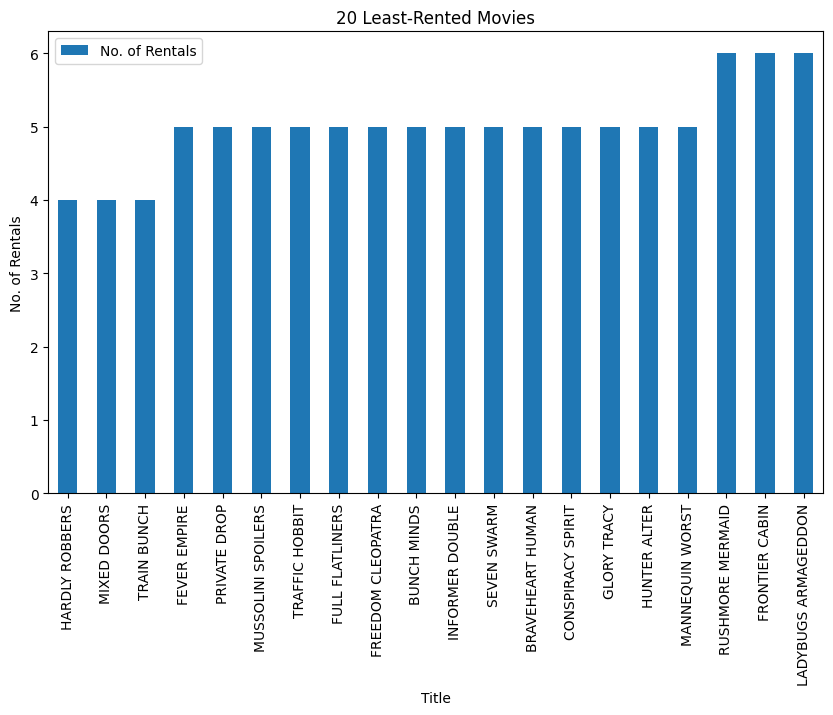

In [230]:
query8 = """ 
SELECT title, COUNT(rental.inventory_id) AS z FROM film
JOIN inventory ON inventory.film_id = film.film_id
JOIN rental ON inventory.inventory_id = rental.inventory_id
GROUP BY film.title
ORDER BY z DESC
LIMIT 20
"""

cursor.execute(query8)
result8 = cursor.fetchall()

df8 = pd.DataFrame(result8, columns = ['Title', 'No. of Rentals'])
df8.plot(kind = 'bar', x="Title", y="No. of Rentals", figsize=(10, 6))
plt.title("20 Most-Rented Movies")
plt.xlabel("Title")
plt.ylabel("No. of Rentals")
plt.show()

query9 = """ 
SELECT title, COUNT(rental.inventory_id) AS z FROM film
JOIN inventory ON inventory.film_id = film.film_id
JOIN rental ON inventory.inventory_id = rental.inventory_id
GROUP BY film.title
ORDER BY z ASC
LIMIT 20
"""

cursor.execute(query9)
result9 = cursor.fetchall()

df9 = pd.DataFrame(result9, columns = ['Title', 'No. of Rentals'])
df9.plot(kind = 'bar', x="Title", y="No. of Rentals", figsize=(10, 6))
plt.title("20 Least-Rented Movies")
plt.xlabel("Title")
plt.ylabel("No. of Rentals")
plt.show()

### Create a graphic that compares the amount of sales each store has brought in.


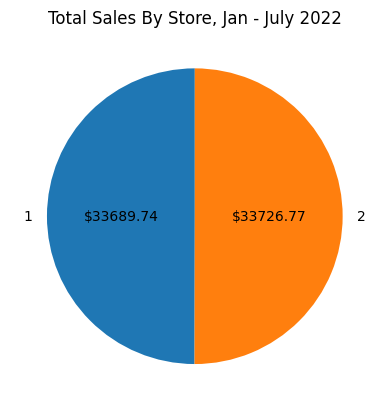

In [243]:
query10 = """ 
SELECT inventory.store_id, SUM(payment.amount)
FROM inventory
JOIN rental ON inventory.inventory_id = rental.inventory_id
JOIN payment ON rental.rental_id = payment.rental_id
GROUP BY store_id
"""
cursor.execute(query10)
result10 = cursor.fetchall()

df10 = pd.DataFrame(result10)

stores = [row[0] for i, row in df10.iterrows()]
sales = [float(row[1]) for i, row in df10.iterrows()]

plt.pie(sales, labels = stores, autopct=lambda p: '${:.2f}'.format(p * sum(sales) / 100), startangle=90, pctdistance=0.5)
plt.title("Total Sales By Store, Jan - July 2022")
plt.show()


### Create a python function that will display a graphic that showcases the top N genres by gross revenue.


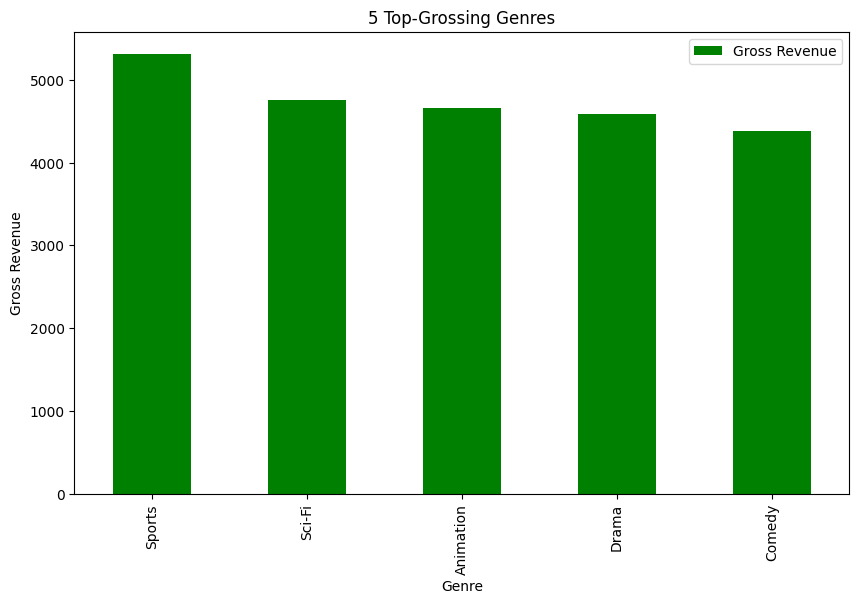

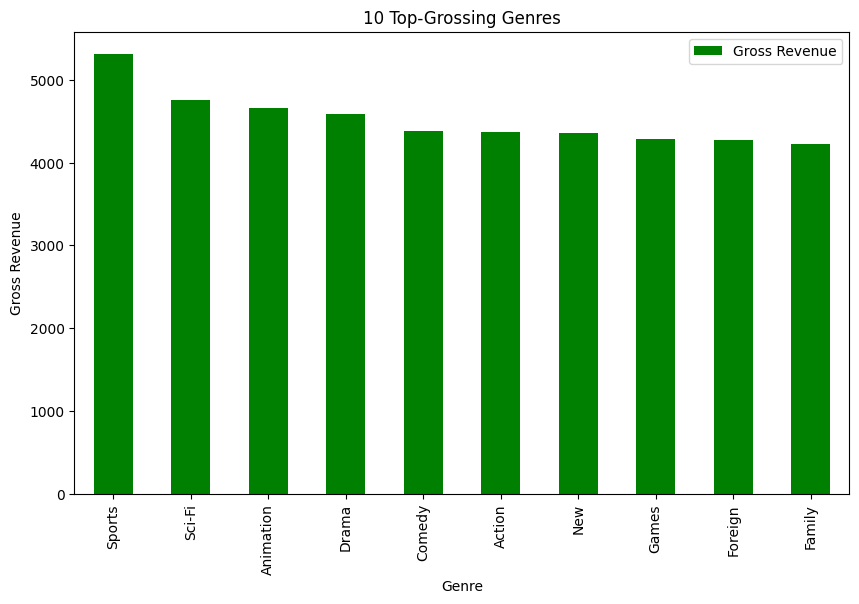

In [250]:
def top_genres(n):
    query11 = f""" 
    SELECT category.name, SUM(payment.amount) AS gross
    FROM category
    FULL JOIN film_category ON category.category_id = film_category.category_id
    FULL JOIN film ON film_category.film_id = film.film_id
    FULL JOIN inventory ON film.film_id = inventory.film_id
    RIGHT JOIN rental ON inventory.inventory_id = rental.inventory_id
    FULL JOIN payment ON rental.rental_id = payment.rental_id
    GROUP BY category.name
    ORDER BY gross DESC
    LIMIT {n}
    """
    
    cursor.execute(query11)
    result11 = cursor.fetchall()
    # FLOATS IN THE DB ("numeric") COME OUT AS DECIMAL OBJECTS AND BREAK THINGS. CONVERT THEM TO FLOATS. Same thing happened with autopct above
    result11 = [(genre, float(gross)) for genre, gross in result11]

    df11 = pd.DataFrame(result11, columns = ['Genre', 'Gross Revenue'])
    df11.plot(kind = 'bar', x="Genre", y="Gross Revenue", figsize=(10, 6), color='green')
    plt.title(f"{n} Top-Grossing Genres")
    plt.xlabel("Genre")
    plt.ylabel("Gross Revenue")
    plt.show()

top_genres(5)
top_genres(10)

### Create a graphic showing the average replacement cost by category


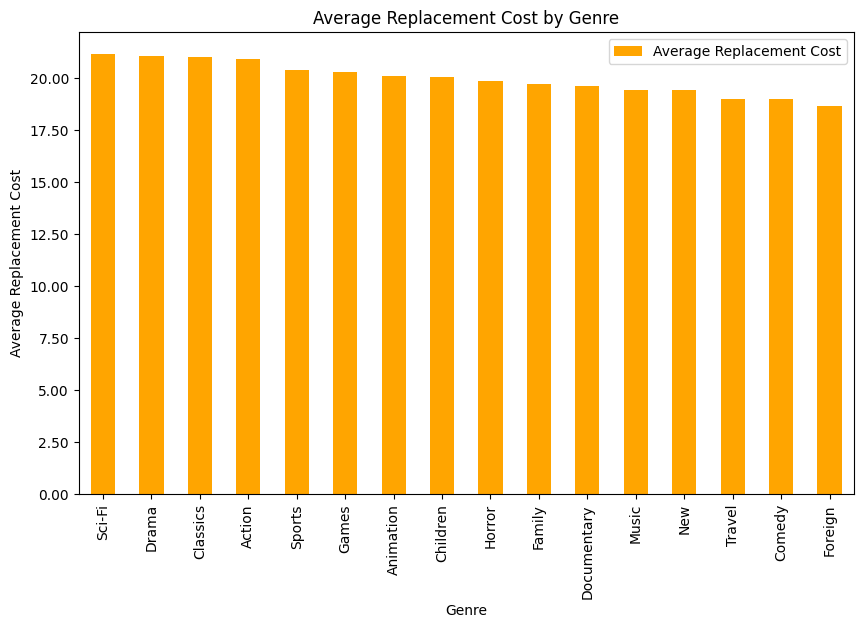

In [255]:
query12= """
SELECT category.name, AVG(replacement_cost) AS arc
FROM category
JOIN film_category ON category.category_id = film_category.category_id
JOIN film ON film_category.film_id = film.film_id
GROUP BY category.name
ORDER BY arc DESC
"""

cursor.execute(query12)
result12 = cursor.fetchall()
result12 = [(genre, float(arc)) for genre, arc in result12]

df12 = pd.DataFrame(result12, columns = ['Genre', 'Average Replacement Cost'])
ax = df12.plot(kind = 'bar', x="Genre", y="Average Replacement Cost", figsize=(10, 6), color='orange')
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:.2f}")) # Force money notation on y axis

plt.title("Average Replacement Cost by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Replacement Cost")
plt.show()

### Create a pie chart showing the percentage of films in each rating category (G, PG, PG-13, etc.)


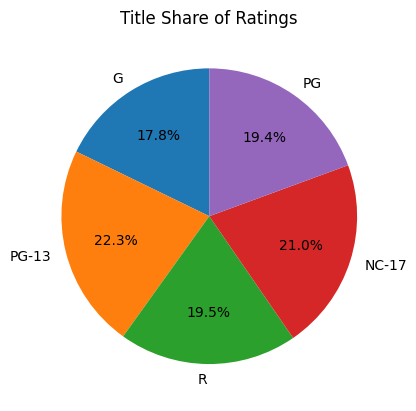

In [260]:
query13 = """ 
SELECT rating, COUNT(rating)
FROM film
GROUP BY rating
"""

cursor.execute(query13)
result13 = cursor.fetchall()

df13 = pd.DataFrame(result13)

ratings = [row[0] for i, row in df13.iterrows()]
share = [row[1] for i, row in df13.iterrows()]

plt.pie(share, labels = ratings, autopct='%.1f%%', startangle=90, pctdistance=0.65)
plt.title("Title Share of Ratings")
plt.show()

### For each category, on average how many rentals of a film need to occur to cover the replacement cost?


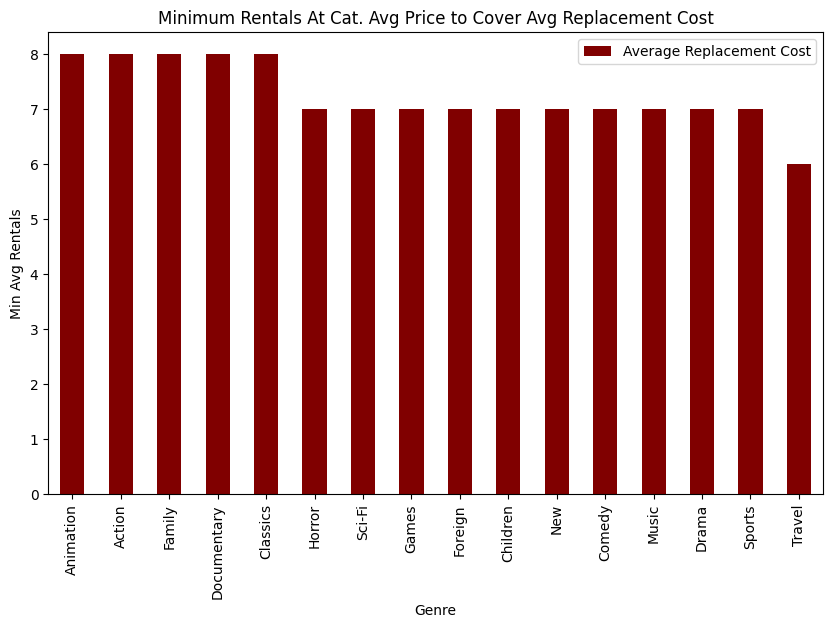

In [263]:
query14= """
WITH category_stats AS (
    SELECT
        category.name,
        AVG(film.rental_rate) AS ar,
        AVG(film.replacement_cost) AS arc
    FROM
        category
        JOIN film_category ON category.category_id = film_category.category_id
        JOIN film ON film_category.film_id = film.film_id
    GROUP BY category.name
)
SELECT
    cs.name,
    CEIL(cs.arc / cs.ar) AS martcar
FROM
    category_stats cs
ORDER BY martcar DESC;
"""

cursor.execute(query14)
result14 = cursor.fetchall()
result14 = [(genre, float(arc)) for genre, arc in result14]

df14 = pd.DataFrame(result14, columns = ['Genre', 'Average Replacement Cost'])
df14.plot(kind = 'bar', x="Genre", y="Average Replacement Cost", figsize=(10, 6), color='maroon')

plt.title("Minimum Rentals At Cat. Avg Price to Cover Avg Replacement Cost")
plt.xlabel("Genre")
plt.ylabel("Min Avg Rentals")
plt.show()

# Analysis
### The owner of these rental stores is working on making an infographic to share with investors that will showcase how each store is doing financially.  She wants you to create at least 4 graphics that she can include in her presentation that will be relevant to her.  These graphics should be designed to provide a clear, concise, and visually appealing overview of how the stores are doing.